# Building a ML Model using Manual Linear Regression Algorithm

#### Here, i have predicted using the Linear Regession algorithms without using the SK learn.
#### I have only used the popular linear formula which include the ssr, sst and rsquare

In [64]:
import pandas as pd #Using the pd alias.
import numpy as np #Using np for the numpy alias.

In [65]:
data = pd.read_csv('data.csv') #Loading our pre-processed data, i.e the data has been cleaned already

data #echoing the variable now made it clear to see we have a clean datasets.
#It cleared such that and mixing cell has been treated.
# Its so clean that, the head of the datasets has been changed to x and y as seen below

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
...,...,...
140,56,59.162366
141,80,75.241484
142,26,28.223258
143,25,25.333237


In [66]:
data.columns #Accessing the column of my datasets

#i.e only used the column method to return the head of the columns present in the datasets.
# This process make the data exploratory easy.

Index(['x', 'y'], dtype='object')

In [67]:
data.index # this return the index of the rows in the datasets

RangeIndex(start=0, stop=145, step=1)

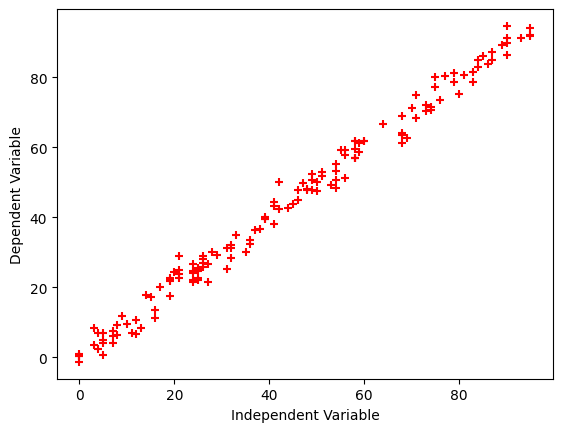

In [89]:
import matplotlib.pyplot as plt

from sklearn import linear_model

plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.scatter(data.x,data.y, color = 'red', marker = '+')

#This helps inform that the datasets fit into linear regression when to be used in building a model

In [69]:
# As from my formula for Linear regression, to calculate B, where b is the Coefficient Value
# B = (x^T  x)^-1 x^T Y
# TO calculate B, we then need x, x Transpose (i.e x^T), y
# then, Lets get x and y first.

In [70]:
data.describe()

,x,y
count,145.000000,145.000000
mean,43.744828,43.630939
std,27.116462,26.951099
min,0.000000,-1.286311
25%,21.000000,22.623654
50%,42.000000,43.265951
75%,68.000000,62.649317
max,95.000000,94.684883


In [71]:
x = data[['x']].copy()
# accessed the x column from the imported datasets and then make a copy of it to the variable x
x

,x
0,24
1,50
2,15
3,38
4,87
...,...
140,56
141,80
142,26
143,25


### Now, after having the x variable, next is to add the unity (i.e 1 ) as column as proved the from linear equation
### Now, Remember, we need to add one to the x column 

In [72]:
x['unit'] = 1 #Added a column all with the value 1 to indicate the unity therein
# Adding the 1 all through existing row in the datasets

x

,x,unit
0,24,1
1,50,1
2,15,1
3,38,1
4,87,1
...,...,...
140,56,1
141,80,1
142,26,1
143,25,1


In [73]:
# Now that the unit has been added to this,
# As from the proove, its needed to change the order of the x data
# Change such that the unit column (the unit with 1 all thorough) comes first then followed by the unit with x
# Changing the order then made it met with the condition of the equation prooved in the note here

x = x[['unit','x']] #This changed the order by placing the unit row first. 
x

,unit,x
0,1,24
1,1,50
2,1,15
3,1,38
4,1,87
...,...,...
140,1,56
141,1,80
142,1,26
143,1,25


In [74]:
# now that i have x, to calculate for b, i will now be needing y and x transpose
# using the .T method to find the transpose and storing in a variable xTranspose
xTranspose = x.T


xTranspose #This idea of calling it like this is known as echoing, i.e i echo the xTranpose variable

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
unit,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
x,24,50,15,38,87,36,12,81,25,5,...,95,79,21,95,54,56,80,26,25,8


In [75]:
y = data[['y']] # Accessing the y column of the data datasets

y #echoed it out

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
140,59.162366
141,75.241484
142,28.223258
143,25.333237


In [76]:
y = data[['y']].copy() #Create a copy of the y column from the dataset and store it to the vairiable y 

y

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
140,59.162366
141,75.241484
142,28.223258
143,25.333237


In [77]:
yTranspose = y.T #Did the transpose of y,
# Though this isnt needed to calculate for B (ie=.e the coefficientet value) but just exploring


yTranspose

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
y,21.549452,47.464463,17.218656,36.586398,87.288984,32.463875,10.780897,80.763399,24.612151,6.963319,...,92.157498,81.222592,25.101141,94.088534,53.251662,59.162366,75.241484,28.223258,25.333237,6.364616


In [78]:
# again, Remember, the regression equation as prooved in the notebook here,

# B = inv(xTranspose x X) x xTranspose x y
# Where B is the coefficient value

# Since i already have x, y and xTranspose, lets solve further

# Firstly, i will solve for (x^T x) i.e xTranspose multiplied by x

# but to achieve that, becasue x and xTranspose aint scalar value but matrixes
# then i need to do the multiplication
# something intresting here, i can multiply because both matrices met the rule of matrices multiplication
# # where the rule says the number of the 1st matrix column must be equal to the row of the 2nd matrix
# Which means the multiplication of xtranspose and x here would be good to go

xTmultiplyx = x.T @ x
# Remeber that the @ is an operator that is used to multiply matrices together ih this scenerio
# While using the @ is just a way, another way of multiplying matric is use the numpy dot notation.
# So take note that, when multiplying scalar digits, we use the * operator
# But when multiplying matrixex like that, we use the @ operator.


xTmultiplyx

,unit,x
unit,145,6343
x,6343,383357


In [79]:
# Now, after sucessful multiplication, as seen above. i will find its invers

# TO find its inverse, i need the inv method i can find within the linear algebra method in the numpy module
# take note  :  linear algebra ======== linalg
# inverse ====== inv()

inverseValue = np.linalg.inv(xTmultiplyx) #Passed by multiplied matrix result into the inv function

# Remember here, you can simply hit the tab button to use the intellisence option to help list 
# possible methods in a class when working on stuffs like that.

# Also, ctrl + i in jupyter lab with bring out the Contextual Help tab to help read documentation faster
inverseValue

array([[ 2.49693287e-02, -4.13140889e-04],
       [-4.13140889e-04,  9.44433690e-06]])

In [80]:
#Calculating for B from by formula here
coefficient_value = inverseValue @ xTranspose @ y

coefficient_value

# Now below is the value for the coeffcient_value (i.e B)

# But notice that the value isnt straighaway enough and clear as its a matrice
# We can then reassign the right column name back to the matricex gotten as coeffcient value 

,y
0,0.394575
1,0.988377


In [81]:
coefficient_value.index = x.columns #This reassign the name of the colun and row of the matrices .

# i.e instead of having 0 and 1, we replace it with unit and x as it was before much heavy calculations

coefficient_value

,y
unit,0.394575
x,0.988377


In [82]:
# Next is to continue with the calculations
# Remember yHat (i.e y with caret at its head :) ) has the formula (yhat  = xB)
# Where B is the coefficient value

yHat = x @ coefficient_value #Recall from my formula here, yHat is the estimated y which is the prediction 

yHat

,y
0,24.115613
1,49.813405
2,15.220224
3,37.952886
4,86.383340
...,...
140,55.743665
141,79.464704
142,26.092367
143,25.103990


### Now, while yhat is the predicted value ( i.e estimated y)
### A way to calculate the  accuracy of the predicted y is by calculating rquare
### rSquare is a recommended and common way of validating the accuracy of a predicted value
### rSquare is common to judge the performance of regression models 
### rSquare values lies between 0 to 100% 
- rSquare formula is       rSquare = (1 - (ssr / sst))
### where ssr == Sum of Square Residual 
- Formula for ssr is    ssr = [ summation (y - yhat)^2 ]
### and sst == SUm of Square Total 
- formula for sst is  sst = [  summation (y - ymean )^2 NB: ymean is also called ybar

In [83]:
# Now, calculating to ssr (i.e SUm of Square Residual)
# FOrmula is ssr = [ summation (y - yhat)^2 ]
ssr = ((y - yHat)**2).sum()

ssr

y    1159.674735
dtype: float64

In [84]:
# Then i calculate for sst using its formula 
# sst = [  summation (y - ymean )^2 NB: ymean is also called ybar
# Lets solve for ymean and then sst
yMean = np.mean(y)

yMean

43.63093935146896

In [85]:
#Calculating sst
sst = ((y - yMean)**2).sum()

sst

y    104596.088053
dtype: float64

In [86]:
# Now lets calculate rSquare

rSquare = 1 - (ssr/sst)

rSquare

y    0.988913
dtype: float64

## As seen from the result of rSquare, its 0.988913, which means that our model is 98% accurate. This means that the predicted value for y is almost very accurate.
- Note: another way to use the word is; Our Confidence level is 98% accurate.
- Those are just terms used inthe field

### Note that while the accurate here is good, if a model have a poor accurate value, maybe 70 or below, that a sign that maybe the dataset used is not a linear, and then linear regression might not be the best algorithm to use to solve the problem or to use with the dataset

In [87]:
# Now after allof this, lets plot this data we have on a linear graph to see how the data truly aligns
# FOr the plotting, we would be using the matlplotlib

import matplotlib.pyplot as mplt

mplt

<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

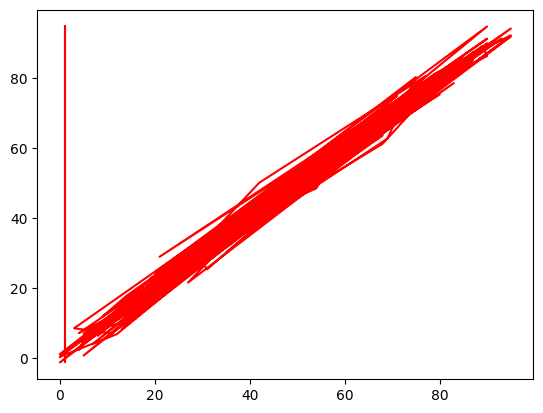

In [88]:
mplt.plot(x, y, color = 'Red')